In [79]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt

In [80]:
#1 First step data colection( data import)
data = pd.read_csv('Tr_ev_fiyatlari_v2.csv') # ilk adım veri setini okumak

In [81]:
data.head()

,fiyat,alan,yatak_odasi,banyo_sayisi,kat_sayisi,anayol_baglanti,misafir_odası,bodrum,sıcak_su,klima,otopark,mob_drm
0,13300000,7420,4,2,3,evet,hayır,hayır,hayır,evet,2,mobilyalı
1,12250000,8960,4,4,4,evet,hayır,hayır,hayır,evet,3,mobilyalı
2,12250000,9960,3,2,2,evet,hayır,evet,hayır,hayır,2,yarı mobilyalı
3,12215000,7500,4,2,2,evet,hayır,evet,hayır,evet,3,mobilyalı
4,11410000,7420,4,1,2,evet,evet,evet,hayır,evet,2,mobilyalı


In [82]:

print(data.head())

      fiyat  alan  yatak_odasi  banyo_sayisi  kat_sayisi anayol_baglanti  \
0  13300000  7420            4             2           3            evet   
1  12250000  8960            4             4           4            evet   
2  12250000  9960            3             2           2            evet   
3  12215000  7500            4             2           2            evet   
4  11410000  7420            4             1           2            evet   

  misafir_odası bodrum sıcak_su  klima  otopark         mob_drm  
0         hayır  hayır    hayır   evet        2       mobilyalı  
1         hayır  hayır    hayır   evet        3       mobilyalı  
2         hayır   evet    hayır  hayır        2  yarı mobilyalı  
3         hayır   evet    hayır   evet        3       mobilyalı  
4          evet   evet    hayır   evet        2       mobilyalı  


In [83]:
# 2. Data Preprocessing
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   fiyat            545 non-null    int64 
 1   alan             545 non-null    int64 
 2   yatak_odasi      545 non-null    int64 
 3   banyo_sayisi     545 non-null    int64 
 4   kat_sayisi       545 non-null    int64 
 5   anayol_baglanti  545 non-null    object
 6   misafir_odası    545 non-null    object
 7   bodrum           545 non-null    object
 8   sıcak_su         545 non-null    object
 9   klima            545 non-null    object
 10  otopark          545 non-null    int64 
 11  mob_drm          545 non-null    object
dtypes: int64(6), object(6)
memory usage: 51.2+ KB
None


In [84]:
print(data.describe())

              fiyat          alan  yatak_odasi  banyo_sayisi  kat_sayisi  \
count  5.450000e+02    545.000000   545.000000    545.000000  545.000000   
mean   4.766729e+06   5150.541284     2.965138      1.286239    1.805505   
std    1.870440e+06   2170.141023     0.738064      0.502470    0.867492   
min    1.750000e+06   1650.000000     1.000000      1.000000    1.000000   
25%    3.430000e+06   3600.000000     2.000000      1.000000    1.000000   
50%    4.340000e+06   4600.000000     3.000000      1.000000    2.000000   
75%    5.740000e+06   6360.000000     3.000000      2.000000    2.000000   
max    1.330000e+07  16200.000000     6.000000      4.000000    4.000000   

          otopark  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


In [85]:
object_columns = data.select_dtypes(include=['object']).columns  # this code is for object columns, we can use it for object columns
object_columns                                                   # bu kod object türündeki sütunları seçmek için kullanılır          

Index(['anayol_baglanti', 'misafir_odası', 'bodrum', 'sıcak_su', 'klima',
       'mob_drm'],
      dtype='object')

In [86]:
data = pd.get_dummies(data, columns=object_columns) # get_dummies is for object columns, we can use it for object columns
print(data.head(3))                                   # get_dummies object türündeki sütunlar için kullanılır

      fiyat  alan  yatak_odasi  banyo_sayisi  kat_sayisi  otopark  \
0  13300000  7420            4             2           3        2   
1  12250000  8960            4             4           4        3   
2  12250000  9960            3             2           2        2   

   anayol_baglanti_evet  anayol_baglanti_hayır  misafir_odası_evet  \
0                     1                      0                   0   
1                     1                      0                   0   
2                     1                      0                   0   

   misafir_odası_hayır  bodrum_evet  bodrum_hayır  sıcak_su_evet  \
0                    1            0             1              0   
1                    1            0             1              0   
2                    1            1             0              0   

   sıcak_su_hayır  klima_evet  klima_hayır  mob_drm_mobilyalı  \
0               1           1            0                  1   
1               1           1          

In [87]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data)   
data_normalized = pd.DataFrame(data=normalized_data, columns=data.columns) # we normalized the data
print(data_normalized)                                                      # veriyi normalize ettik

        fiyat      alan  yatak_odasi  banyo_sayisi  kat_sayisi   otopark  \
0    4.566365  1.046726     1.403419      1.421812    1.378217  1.517692   
1    4.004484  1.757010     1.403419      5.405809    2.532024  2.679409   
2    4.004484  2.218232     0.047278      1.421812    0.224410  1.517692   
3    3.985755  1.083624     1.403419      1.421812    0.224410  2.679409   
4    3.554979  1.046726     1.403419     -0.570187    0.224410  1.517692   
..        ...       ...          ...           ...         ...       ...   
540 -1.576868 -0.991879    -1.308863     -0.570187   -0.929397  1.517692   
541 -1.605149 -1.268613     0.047278     -0.570187   -0.929397 -0.805741   
542 -1.614327 -0.705921    -1.308863     -0.570187   -0.929397 -0.805741   
543 -1.614327 -1.033389     0.047278     -0.570187   -0.929397 -0.805741   
544 -1.614327 -0.599839     0.047278     -0.570187    0.224410 -0.805741   

     anayol_baglanti_evet  anayol_baglanti_hayır  misafir_odası_evet  \
0              

In [88]:
from sklearn.preprocessing import MinMaxScaler  # we normalized the data
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data)
data_normalized = pd.DataFrame(data=normalized_data, columns=data.columns)
print(data_normalized.head())

      fiyat      alan  yatak_odasi  banyo_sayisi  kat_sayisi   otopark  \
0  1.000000  0.396564          0.6      0.333333    0.666667  0.666667   
1  0.909091  0.502405          0.6      1.000000    1.000000  1.000000   
2  0.909091  0.571134          0.4      0.333333    0.333333  0.666667   
3  0.906061  0.402062          0.6      0.333333    0.333333  1.000000   
4  0.836364  0.396564          0.6      0.000000    0.333333  0.666667   

   anayol_baglanti_evet  anayol_baglanti_hayır  misafir_odası_evet  \
0                   1.0                    0.0                 0.0   
1                   1.0                    0.0                 0.0   
2                   1.0                    0.0                 0.0   
3                   1.0                    0.0                 0.0   
4                   1.0                    0.0                 1.0   

   misafir_odası_hayır  bodrum_evet  bodrum_hayır  sıcak_su_evet  \
0                  1.0          0.0           1.0            0.0  

In [89]:
y = data_normalized["fiyat"] # we seperated the data
x = data_normalized.drop("fiyat", axis=1)

In [90]:
print(y.head())
print(x.head()) 

0    1.000000
1    0.909091
2    0.909091
3    0.906061
4    0.836364
Name: fiyat, dtype: float64
       alan  yatak_odasi  banyo_sayisi  kat_sayisi   otopark  \
0  0.396564          0.6      0.333333    0.666667  0.666667   
1  0.502405          0.6      1.000000    1.000000  1.000000   
2  0.571134          0.4      0.333333    0.333333  0.666667   
3  0.402062          0.6      0.333333    0.333333  1.000000   
4  0.396564          0.6      0.000000    0.333333  0.666667   

   anayol_baglanti_evet  anayol_baglanti_hayır  misafir_odası_evet  \
0                   1.0                    0.0                 0.0   
1                   1.0                    0.0                 0.0   
2                   1.0                    0.0                 0.0   
3                   1.0                    0.0                 0.0   
4                   1.0                    0.0                 1.0   

   misafir_odası_hayır  bodrum_evet  bodrum_hayır  sıcak_su_evet  \
0                  1.0      

In [91]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20, random_state=7) # we seperated the data for train and test / veriyi train ve test için ayırdık

In [92]:
#3) Model Building
#Choosing the model 
from sklearn.linear_model import LinearRegression   # we choose the model / modeli seçtik
model = LinearRegression()
#training the model
model.fit(xtrain, ytrain)   # we trained the model / modeli eğittik

LinearRegression()

In [93]:
ypred = model.predict(xtest)

In [94]:
ytest

542    0.000000
70     0.436364
504    0.078182
221    0.261212
519    0.060606
         ...   
364    0.169091
244    0.242424
453    0.121212
506    0.073939
496    0.081818
Name: fiyat, Length: 109, dtype: float64

In [95]:
len(ypred)

109

In [96]:
#4) Model Evaluation - Testing / Model Değerlendirme - Test
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt


Modelin doğruluk oranı: 0.64


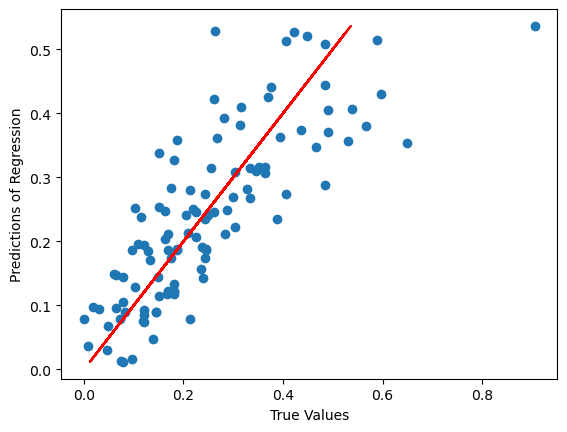

In [97]:
y_pred = model.predict(xtest)
r2 = r2_score(ytest, y_pred)
print(f"Modelin doğruluk oranı: {r2:.2f}")

plt.scatter(ytest, y_pred)
plt.plot(y_pred, y_pred, color='red')
plt.xlabel("True Values")   
plt.ylabel("Predictions of Regression")  
plt.show() 

In [98]:
#5 
print("Evin özelliklerini giriniz")
ozellik=[]
ozellik.append(int(input("Evin büyüklüğü bahçe dahil           : ")))
ozellik.append(int(input("Yatak odası sayısı                   : ")))
ozellik.append(int(input("Banyo sayısı                         : ")))
ozellik.append(int(input("Kat sayısı                           : ")))
ozellik.append(int(input("Otopark sayısı                       : ")))
ozellik.append(int(input("Ana yol bağlantısı var mı? [E=1/H=0] : ")))
ozellik.append(int(input("Misafir odası var mı?      [E=1/H=0] : ")))
ozellik.append(int(input("Bodrumu var mı?            [E=1/H=0] : ")))
ozellik.append(int(input("Sıcak su var mı?           [E=1/H=0] : ")))
ozellik.append(int(input("Klima var mı?              [E=1/H=0] : ")))
ozellik.append(int(input("Tam mobilyalı mı?          [E=1/H=0] : ")))
ozellik.append(int(input("Yarım mobilyalı mı?        [E=1/H=0] : ")))
print(ozellik)
tahmini_fiyat= model.predict([ozellik])
print("--------------------------------------------")
print("Tahmini ev fiyatı:",int(tahmini_fiyat),"...")
print("--------------------------------------------")

Evin özelliklerini giriniz


ValueError: invalid literal for int() with base 10: ''